𝑘-means and hierarchical clustering to the ORL face dataset. Set 𝑘 = 2 in 𝑘-means and select 2 clusters in hierarchical clustering. Do the clustering results match the two genders?

In [1]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
import math
import matplotlib.pyplot as plt
import os


In [2]:
import numpy


gender = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [3]:
from PIL import Image


folder = './images/'  # Updated folder path

def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder(folder)

pixels.shape


(400, 5600)

In [4]:
y = gender
X = pixels

# **K-means**

In [5]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print((kmeans.labels_))




[0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]


Find **the best** accuracy by comparing the values predicted with the original ones for K-Means

In [6]:
count_kmeans = 0
for i, j in zip(kmeans.labels_, gender):
  if i == j:
    count_kmeans = count_kmeans + 1

print(count_kmeans)

accurancy_kmeans = (count_kmeans * 100) / len(gender)
print(accurancy_kmeans)

218
54.5


Checking if I get the same accuracy by the Confusion Matrix and also finding the best Confusion Matrix for K-Means


In [7]:
from sklearn.metrics import confusion_matrix

cm_kmeans = confusion_matrix(gender, (kmeans.labels_))

acc_cm_kmeans = np.trace(cm_kmeans) / np.sum(cm_kmeans)
print(acc_cm_kmeans)

0.545


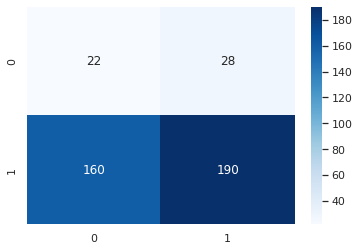

In [7]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues")

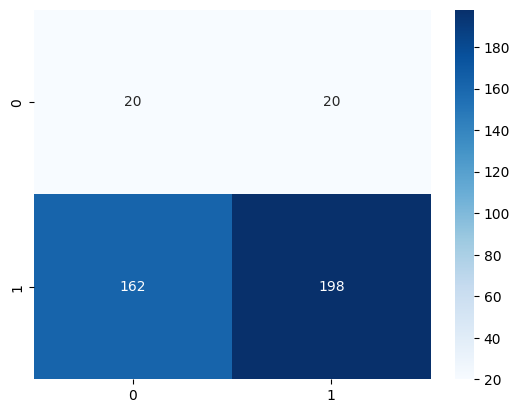

In [11]:
import numpy as np
import seaborn as sns
from scipy.optimize import linear_sum_assignment

# Assuming cm_kmeans is your confusion matrix that you've calculated previously
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

row_ind, col_ind = linear_sum_assignment(_make_cost_m(cm_kmeans))
cm2_kmeans = cm_kmeans[:, col_ind]

ax = sns.heatmap(cm2_kmeans, annot=True, fmt="d", cmap="Blues")


Both accuracies are the same! Max ACC for K-Means

In [12]:
max_acc_kmeans = np.trace(cm2_kmeans) / np.sum(cm2_kmeans)
print("Max acc using K-Means:", 100* max_acc_kmeans,"%") 

Max acc using K-Means: 54.50000000000001 %


# **Hierarchical Clustering**

In [16]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering



cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = cluster.fit_predict(X)
print(cluster_labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]


Find **the best** accuracy by comparing the values predicted with the original ones for Hierarchical Clustering

In [17]:
count_cluster = 0
for i, j in zip(cluster.labels_, gender):
  if i == j:
    count_cluster = count_cluster + 1

print(count_cluster)

accurancy_cluster = (count_cluster * 100) / len(gender)
print(accurancy_cluster)

225
56.25


Checking if I get the same accuracy by the Confusion Matrix and also finding the best Confusion Matrix for Hierarchical Clustering

0.5625


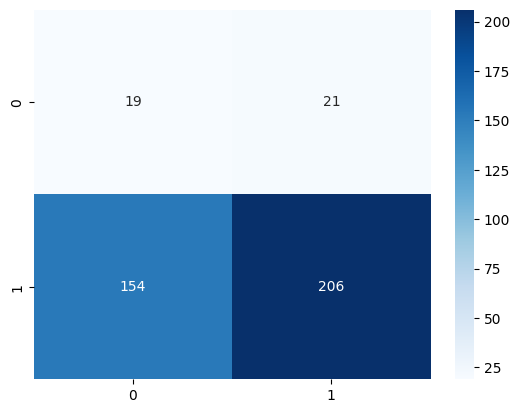

In [18]:
cm_hierar = confusion_matrix(gender, (cluster.labels_))

acc_cm_hierar = np.trace(cm_hierar) / np.sum(cm_hierar)
print(acc_cm_hierar)

ax = sns.heatmap(cm_hierar, annot=True, fmt="d", cmap="Blues")

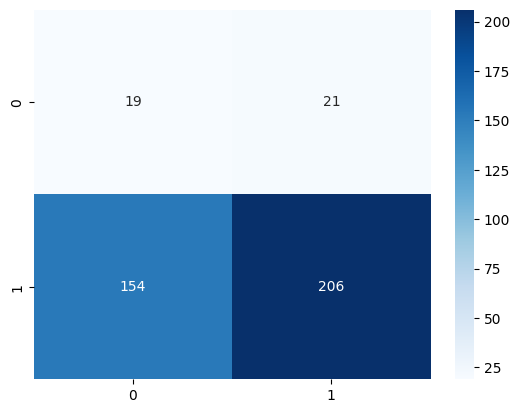

In [21]:
import numpy as np
import seaborn as sns
from scipy.optimize import linear_sum_assignment

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

# Assuming 'cm_hierar' is your confusion matrix
row_ind, col_ind = linear_sum_assignment(_make_cost_m(cm_hierar))
cm2_hierar = cm_hierar[:, col_ind]

ax = sns.heatmap(cm2_hierar, annot=True, fmt="d", cmap="Blues")


Both accuracies are the same! Max ACC for K Means Hierarchical Clustering

In [22]:
max_acc_hierar_ = np.trace(cm2_hierar) / np.sum(cm2_hierar)
print("Max acc using Hierarchical clustering:", 100* max_acc_hierar_,"%") 

Max acc using Hierarchical clustering: 56.25 %


Conclusion:

Both algorithms had the worst predictions comparting to the Supervisory Learning ones implemented last homework. One of the reasons is that they don't have access to the output, and it's hard to cluster between two groups when one possible work has so fewer data compared to the other one. 

It seems that unsupervised learning suffered less bias for this application since it didn't have access to the labels.